In [1]:
%load_ext autoreload
%autoreload 2

In [22]:
import requests
from datetime import datetime, timezone, timedelta
import pandas as pd
from pandas.io.json import json_normalize
from data_loader.data_generator import DataGenerator
from models.lstm_model import LSTMModel
from trainers.trainer import Trainer
from utils.dirs import create_dirs
from utils.logger import Logger
import json
from utils.config import process_config
import tensorflow as tf
import shutil
from evalers.evaler import Evaler
import numpy as np
import matplotlib.pyplot as plt
import os

In [23]:
def download_ohlcv(symbol, start_date, end_date):
    date_iterator = start_date - timedelta(hours=1)
    
    ohlcv_df = pd.DataFrame()
    
    while date_iterator < end_date:
        delta = timedelta(seconds=min((end_date - date_iterator).total_seconds(), 2000 * 3600))
        limit = delta.total_seconds() // 3600 - 1
        date_iterator += delta
        
        params={
            'fsym': symbol,
            'tsym': 'USD',
            'limit': limit,
            'toTs': date_iterator.timestamp()
        }
        
        r = requests.get('https://min-api.cryptocompare.com/data/histohour', params=params)
        data = json_normalize(r.json(), record_path="Data")
        ohlcv_df = ohlcv_df.append(data)

    ohlcv_df['time'] = pd.to_datetime(ohlcv_df['time'], unit='s')
    ohlcv_df.set_index('time', inplace=True)
    ohlcv_df = ohlcv_df.tz_localize('UTC')
    
    return ohlcv_df

In [24]:
start_date = datetime(2018, 3, 30, 0)
end_date = datetime(2018, 9, 30, 0)
symbol = 'BTC'
keyword = 'Bitcoin'

In [5]:
ohlcv_df = download_ohlcv('BTC', start_date, end_date)

In [6]:
data = np.array(ohlcv_df['close'].values).reshape(-1, 1)

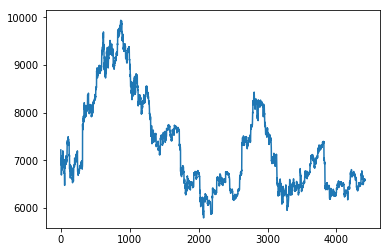

In [25]:
plt.plot(data)
plt.show()

In [69]:
config = {
    'exp_name': 'bitcoin_univariate',
    'num_epochs': 2000,
    'learning_rate': 0.0001,
    'batch_size': 100,
    'sequence_length': 8,
    'max_to_keep': 5,
    'test_size': 0.30,
    'num_inputs': 1,
    'num_outputs': 1,
    'rnn_units': [40, 40, 40, 40, 40]
}

config_path = 'configs/{}.json'.format(config['exp_name'])

with open(config_path, 'w') as config_file:
    json.dump(config, config_file)

config = process_config(config_path)
if os.path.exists(config.summary_dir):
    shutil.rmtree(config.summary_dir)
create_dirs([config.summary_dir, config.checkpoint_dir])

0

In [70]:
tf.reset_default_graph()

In [71]:
sess = tf.Session()

In [72]:
generator = DataGenerator(config, data)

In [73]:
model = LSTMModel(config)

In [74]:
logger = Logger(sess, config)

In [75]:
trainer = Trainer(sess, model, generator, config, logger)

In [76]:
trainer.train()

Saving model...
Model saved


Saving model...
Model saved


Saving model...
Model saved


Saving model...
Model saved


Saving model...
Model saved


Saving model...
Model saved


Saving model...
Model saved


Saving model...
Model saved


Saving model...
Model saved


Saving model...
Model saved


Saving model...
Model saved


Saving model...
Model saved


Saving model...
Model saved


Saving model...
Model saved


Saving model...
Model saved


Saving model...
Model saved


Saving model...
Model saved


Saving model...
Model saved


Saving model...
Model saved


Saving model...
Model saved


Saving model...
Model saved


Saving model...
Model saved


Saving model...
Model saved


Saving model...
Model saved


Saving model...
Model saved


Saving model...
Model saved


Saving model...
Model saved


Saving model...
Model saved


Saving model...
Model saved


Saving model...
Model saved


Saving model...
Model saved


Saving model...
Model saved


Saving model...
Model saved


Saving model...
Model saved


Saving model...
Model saved


Saving model...
Model saved


Saving model...
Model saved


Saving model...
Model saved


Saving model...
Model saved


Saving model...
Model saved


Saving model...
Model saved


Saving model...
Model saved


Saving model...
Model saved


Saving model...
Model saved


Saving model...
Model saved


Saving model...
Model saved


Saving model...
Model saved


Saving model...
Model saved


Saving model...
Model saved


Saving model...
Model saved


Saving model...
Model saved


Saving model...
Model saved


Saving model...
Model saved


Saving model...
Model saved


Saving model...
Model saved


Saving model...
Model saved


Saving model...
Model saved


Saving model...
Model saved


Saving model...
Model saved


Saving model...
Model saved


Saving model...
Model saved


Saving model...
Model saved


Saving model...
Model saved


Saving model...
Model saved


Saving model...
Model saved


Saving model...
Model saved


Saving model...
Model saved


Saving model...
Model saved


Saving model...
Model saved


Saving model...
Model saved


Saving model...
Model saved


Saving model...
Model saved


Saving model...
Model saved


Saving model...
Model saved


Saving model...
Model saved


Saving model...
Model saved


Saving model...
Model saved


Saving model...
Model saved


Saving model...
Model saved


Saving model...
Model saved


Saving model...
Model saved


Saving model...
Model saved


Saving model...
Model saved


Saving model...
Model saved


Saving model...
Model saved


Saving model...
Model saved


Saving model...
Model saved


Saving model...
Model saved


Saving model...
Model saved


Saving model...
Model saved


Saving model...
Model saved


Saving model...
Model saved


Saving model...
Model saved


Saving model...
Model saved


Saving model...
Model saved


Saving model...
Model saved


Saving model...
Model saved


Saving model...
Model saved


Saving model...
Model saved


Saving model...
Model saved


Saving model...
Model saved


Saving model...
Model saved


Saving model...
Model saved


Saving model...
Model saved


Saving model...
Model saved


Saving model...
Model saved


Saving model...
Model saved


Saving model...
Model saved


Saving model...
Model saved


Saving model...
Model saved


Saving model...
Model saved


Saving model...
Model saved


Saving model...
Model saved


Saving model...
Model saved


Saving model...
Model saved


Saving model...
Model saved


Saving model...
Model saved


Saving model...
Model saved


Saving model...
Model saved


Saving model...
Model saved


Saving model...
Model saved


Saving model...
Model saved


Saving model...
Model saved


Saving model...
Model saved


Saving model...
Model saved


Saving model...
Model saved


Saving model...
Model saved


Saving model...
Model saved


Saving model...
Model saved


Saving model...
Model saved


Saving model...
Model saved


Saving model...
Model saved


Saving model...
Model saved


Saving model...
Model saved


Saving model...
Model saved


Saving model...
Model saved


Saving model...
Model saved


Saving model...
Model saved


Saving model...
Model saved


Saving model...
Model saved


Saving model...
Model saved


Saving model...
Model saved


Saving model...
Model saved


Saving model...
Model saved


Saving model...
Model saved


Saving model...
Model saved


Saving model...
Model saved


Saving model...
Model saved


Saving model...
Model saved


Saving model...
Model saved


Saving model...
Model saved


Saving model...
Model saved


Saving model...
Model saved


Saving model...
Model saved


Saving model...
Model saved


Saving model...
Model saved


Saving model...
Model saved


Saving model...
Model saved


Saving model...
Model saved


Saving model...
Model saved


Saving model...
Model saved


Saving model...
Model saved


Saving model...
Model saved


Saving model...
Model saved


Saving model...
Model saved


Saving model...
Model saved


Saving model...
Model saved


Saving model...
Model saved


Saving model...
Model saved


Saving model...
Model saved


Saving model...
Model saved


Saving model...
Model saved


Saving model...
Model saved


Saving model...
Model saved


Saving model...
Model saved


Saving model...
Model saved


Saving model...
Model saved


Saving model...
Model saved


Saving model...
Model saved


Saving model...
Model saved


Saving model...
Model saved


Saving model...
Model saved


Saving model...
Model saved


Saving model...
Model saved


Saving model...
Model saved


Saving model...
Model saved


Saving model...
Model saved


Saving model...
Model saved


Saving model...
Model saved


Saving model...
Model saved


Saving model...
Model saved


Saving model...
Model saved


Saving model...
Model saved


Saving model...
Model saved


Saving model...
Model saved


Saving model...
Model saved


Saving model...
Model saved


Saving model...
Model saved


Saving model...
Model saved


Saving model...
Model saved


Saving model...
Model saved


Saving model...
Model saved


Saving model...
Model saved


Saving model...
Model saved


Saving model...
Model saved


Saving model...
Model saved


Saving model...
Model saved


Saving model...
Model saved


Saving model...
Model saved


Saving model...
Model saved


Saving model...
Model saved


Saving model...
Model saved


Saving model...
Model saved


Saving model...
Model saved


Saving model...
Model saved


Saving model...
Model saved


Saving model...
Model saved


Saving model...
Model saved


Saving model...
Model saved


Saving model...
Model saved


Saving model...
Model saved


Saving model...
Model saved


Saving model...
Model saved


Saving model...
Model saved


Saving model...
Model saved


Saving model...
Model saved


Saving model...
Model saved


KeyboardInterrupt: 

In [77]:
evaler = Evaler(sess, model, generator, config)

In [78]:
train_loss, train_prediction, test_loss, test_prediction = evaler.evaluate()

In [79]:
train_loss

0.001426541

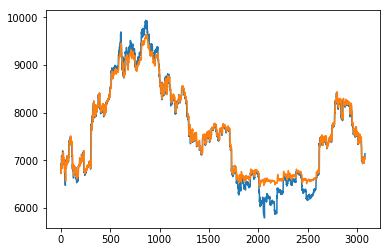

In [80]:
plt.plot(generator.data_train[10:])
plt.plot(train_prediction)

In [81]:
test_loss

0.0020110244

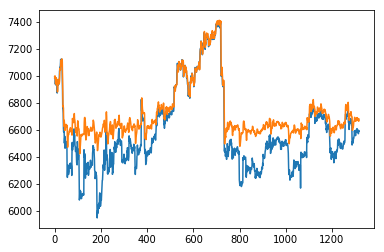

In [82]:
plt.plot(generator.data_test[config.sequence_length:])
plt.plot(test_prediction)